In [3]:
import pandas as pd
import numpy as np
import wfdb
import ast
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization, Activation, Dropout
from keras.utils import to_categorical
sr =100

with tf.device('/CPU:0'):
    ### Loading raw data into mutable Datframes
    ptb = pd.read_csv('../data/ptbxl_database.csv')
    def load_raw_data(df, sampling_rate, path):
        if(sampling_rate == 100):
            data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
        else:
            data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
        data = np.array([signal for signal, meta in data])
        return data
    
    # load and convert annotation data
    Y = pd.read_csv('../data/ptbxl_database.csv', index_col='ecg_id')
    Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

    # Load raw signal data
    X = load_raw_data(Y, sr, '../data/')

    # Load scp_statements.csv for diagnostic aggregation
    agg_df = pd.read_csv('../data/scp_statements.csv', index_col=0)
    agg_df = agg_df[agg_df.diagnostic == 1]

    def aggregate_diagnostic(y_dic):
        tmp = []
        for key in y_dic.keys():
            if key in agg_df.index:
                tmp.append(agg_df.loc[key].diagnostic_class)
        return list(set(tmp))


    # Apply diagnostic superclass
    Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)


In [ ]:
len(X_test)

983

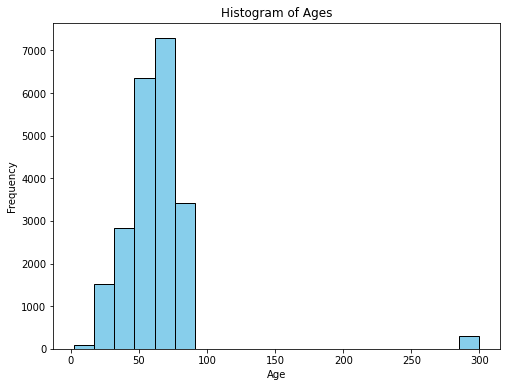

In [ ]:
# confused about the 300 for the ages category

ages = Y.age

# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(ages, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Ages')
plt.show()


In [ ]:
condition = (y_train <= 250)  
X_train = X_train[condition]
y_train = y_train[condition]

condition = (y_val <= 250)  
X_val = X_val[condition]
y_val = y_val[condition]

condition = (y_test <= 250)  
X_test = X_test[condition]
y_test = y_test[condition]

In [ ]:
# converting y values into an array
y_test = y_test.values
y_train=y_train.values
y_val=y_val.values

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization, Activation, Dropout
from keras.utils import to_categorical



#Building the model
model = Sequential()
input_shape = (1000, 12)  

filters = [16, 16, 32, 32, 64, 64, 64, 64]
kernel_sizes = [7, 5, 5, 5, 5, 3, 3, 3]
max_pool_factors = [2, 4, 2, 4, 2, 2, 2]

for i in range(7):  
    # Convolutional Layer
    model.add(Conv1D(filters=filters[i], kernel_size=kernel_sizes[i], padding='same', input_shape=input_shape))
    # Batch Normalization Layer
    model.add(BatchNormalization())
    # ReLU Activation
    model.add(Activation('relu'))
    # MaxPooling1D Layer
    model.add(MaxPooling1D(pool_size=max_pool_factors[i]))

model.add(Conv1D(filters=128, kernel_size=12, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Flatten())  # Flatten the output to be compatible with Dense layers

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# second Fully Connected layer (64 units)
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Final Dense layer with two units and softmax activation for two-class output
model.add(Dense(units=1, activation='linear'))


# model compiling
learning_rate = 3e-4
batch_size = 64

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = 'mean_absolute_error'

model.compile(optimizer=optimizer, loss=loss, metrics=['mae'])
# model training

epochs = 50
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

# Model Evaluation
#loss, accuracy = model.evaluate(X_test, to_categorical(y_test), batch_size=batch_size)

model.save('updated_model.h5')



Epoch 1/50
70/70 [==============================] - 21s 162ms/step - loss: 61.8158 - mae: 61.8158 - val_loss: 62.0811 - val_mae: 62.0811
Epoch 2/50
70/70 [==============================] - 10s 142ms/step - loss: 61.0746 - mae: 61.0746 - val_loss: 61.6687 - val_mae: 61.6687
Epoch 3/50
70/70 [==============================] - 10s 145ms/step - loss: 60.3280 - mae: 60.3280 - val_loss: 60.9170 - val_mae: 60.9170
Epoch 4/50
70/70 [==============================] - 10s 144ms/step - loss: 59.5043 - mae: 59.5043 - val_loss: 60.1376 - val_mae: 60.1376
Epoch 5/50
70/70 [==============================] - 10s 138ms/step - loss: 58.6560 - mae: 58.6560 - val_loss: 59.2929 - val_mae: 59.2929
Epoch 6/50
70/70 [==============================] - 9s 135ms/step - loss: 57.6897 - mae: 57.6897 - val_loss: 58.2183 - val_mae: 58.2183
Epoch 7/50
70/70 [==============================] - 10s 148ms/step - loss: 56.6822 - mae: 56.6822 - val_loss: 56.8038 - val_mae: 56.8038
Epoch 8/50
70/70 [========================

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)


16/16 [==============================] - 0s 24ms/step - loss: 12.8933 - mae: 12.8933


In [ ]:
y_pred = model.predict(X_test)


31/31 [==============================] - 2s 16ms/step


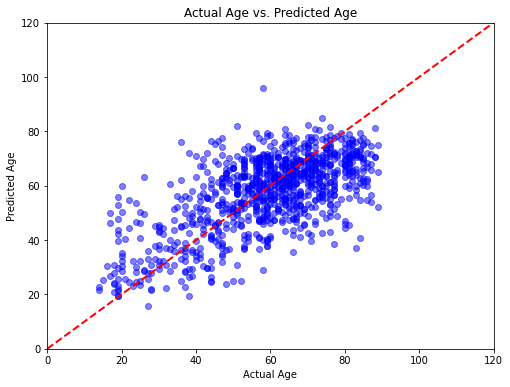

In [ ]:
import matplotlib.pyplot as plt



plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([0, 120], [0, 120], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual Age vs. Predicted Age')
plt.xlim(0, 120)
plt.ylim(0, 120)
plt.show()



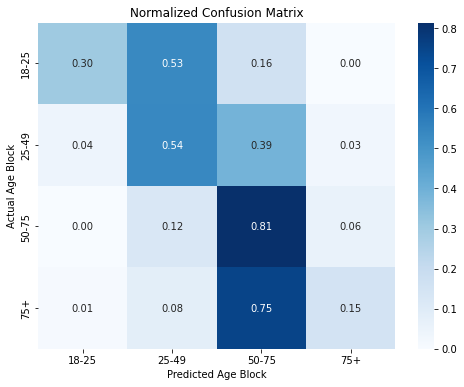

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to bin the age values into age blocks
def bin_age(age):
    if age >= 18 and age <= 25:
        return '18-25'
    elif age > 25 and age <= 49:
        return '25-49'
    elif age > 49 and age <= 75:
        return '50-75'
    else:
        return '75+'

# Assuming y_test contains the actual age values and y_pred contains the predicted age values
# Create the actual age blocks
y_test_blocks = np.array([bin_age(age) for age in y_test])

# Create the predicted age blocks
y_pred_blocks = np.array([bin_age(age) for age in y_pred.flatten()])

# Compute the confusion matrix
cm = confusion_matrix(y_test_blocks, y_pred_blocks, labels=['18-25', '25-49', '50-75', '75+'])

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a heatmap of the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=['18-25', '25-49', '50-75', '75+'], yticklabels=['18-25', '25-49', '50-75', '75+'])
plt.xlabel('Predicted Age Block')
plt.ylabel('Actual Age Block')
plt.title('Normalized Confusion Matrix')
plt.show()


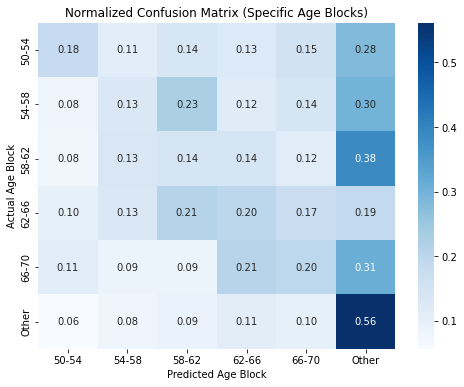

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to bin the age values into specific age blocks
def bin_age(age):
    if age >= 50 and age < 54:
        return '50-54'
    elif age >= 54 and age < 58:
        return '54-58'
    elif age >= 58 and age < 62:
        return '58-62'
    elif age >= 62 and age < 66:
        return '62-66'
    elif age >= 66 and age <= 70:
        return '66-70'
    else:
        return '70+'

# Assuming y_test contains the actual age values and y_pred contains the predicted age values
# Create the actual age blocks
y_test_blocks = np.array([bin_age(age) for age in y_test])

# Create the predicted age blocks
y_pred_blocks = np.array([bin_age(age) for age in y_pred.flatten()])

# Compute the confusion matrix
cm = confusion_matrix(y_test_blocks, y_pred_blocks, labels=['50-54', '54-58', '58-62', '62-66', '66-70', '70+'])

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a heatmap of the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=['50-54', '54-58', '58-62', '62-66', '66-70', 'Other'], yticklabels=['50-54', '54-58', '58-62', '62-66', '66-70', 'Other'])
plt.xlabel('Predicted Age Block')
plt.ylabel('Actual Age Block')
plt.title('Normalized Confusion Matrix (Specific Age Blocks)')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r_squared_values = [r2_score(y_test, y_pred)]
r_squared_values


[0.37294835250393665]

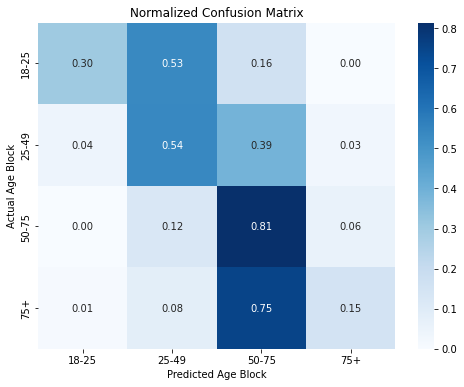

ValueError: multiclass format is not supported

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Function to bin the age values into age blocks
def bin_age(age):
    if age >= 18 and age <= 25:
        return '18-25'
    elif age > 25 and age <= 49:
        return '25-49'
    elif age > 49 and age <= 75:
        return '50-75'
    else:
        return '75+'

# Assuming y_test contains the actual age values and y_pred contains the predicted age values
# Create the actual age blocks
y_test_blocks = np.array([bin_age(age) for age in y_test])

# Create the predicted age blocks
y_pred_blocks = np.array([bin_age(age) for age in y_pred.flatten()])

# Compute the confusion matrix
cm = confusion_matrix(y_test_blocks, y_pred_blocks, labels=['18-25', '25-49', '50-75', '75+'])

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a heatmap of the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=['18-25', '25-49', '50-75', '75+'], yticklabels=['18-25', '25-49', '50-75', '75+'])
plt.xlabel('Predicted Age Block')
plt.ylabel('Actual Age Block')
plt.title('Normalized Confusion Matrix')
plt.show()

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)  # Assuming y_test contains actual ages and y_pred contains predicted ages
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
